In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pwd

'/mnt/c/Users/ignacio.ibarra/Dropbox/jupyter/lenovo'

In [3]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations'
# mb.models.Mubind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [4]:
df = mb.bindome.datasets.PBM.gcn4_dream_v11()
df = df.sort_values('intensity', ascending=False).reset_index(drop=True)

In [5]:
df

,tf_name,tech,intensity,seq
0,gcn4.v11,upbm,437117.583408,CGCTGATAATGAGTCACACCTTGCCTTCCAGACAAAGTCTGTGTTC...
1,gcn4.v11,upbm,409629.925695,TCCTGTGACTCATCCATACTCGAACATCCTTATGGAGTCTGTGTTC...
2,gcn4.v11,upbm,390667.969212,CTAGTATGATGCTAACAGCATGATGACTCATACCGAGTCTGTGTTC...
3,gcn4.v11,upbm,377628.072915,TTGCGTGGTCGTCGTATTGTATGACTCATGAATTTAGTCTGTGTTC...
4,gcn4.v11,upbm,360399.922962,TGTGAGTGACTCATAGTAGATTGATTTGAAGGTTAAGTCTGTGTTC...
...,...,...,...,...
41899,gcn4.v11,upbm,5709.272026,CCGGGCTAAGAAAGGATGGAGCGCTAGTCCGGGTGCGTCTGTGTTC...
41900,gcn4.v11,upbm,5058.172853,AGAGCCATCAAGCTCCTATCTAGGACGGCCGAGCGCGTCTGTGTTC...
41901,gcn4.v11,upbm,4634.742298,GATGCAAGATAAAATAGATTCGGAGCTTCTAGAATGGTCTGTGTTC...
41902,gcn4.v11,upbm,2481.035063,CACGCCATCGTTATGAGCCTCCGGAGCGTTTAGAACGTCTGTGTTC...


In [6]:
df

,tf_name,tech,intensity,seq
0,gcn4.v11,upbm,437117.583408,CGCTGATAATGAGTCACACCTTGCCTTCCAGACAAAGTCTGTGTTC...
1,gcn4.v11,upbm,409629.925695,TCCTGTGACTCATCCATACTCGAACATCCTTATGGAGTCTGTGTTC...
2,gcn4.v11,upbm,390667.969212,CTAGTATGATGCTAACAGCATGATGACTCATACCGAGTCTGTGTTC...
3,gcn4.v11,upbm,377628.072915,TTGCGTGGTCGTCGTATTGTATGACTCATGAATTTAGTCTGTGTTC...
4,gcn4.v11,upbm,360399.922962,TGTGAGTGACTCATAGTAGATTGATTTGAAGGTTAAGTCTGTGTTC...
...,...,...,...,...
41899,gcn4.v11,upbm,5709.272026,CCGGGCTAAGAAAGGATGGAGCGCTAGTCCGGGTGCGTCTGTGTTC...
41900,gcn4.v11,upbm,5058.172853,AGAGCCATCAAGCTCCTATCTAGGACGGCCGAGCGCGTCTGTGTTC...
41901,gcn4.v11,upbm,4634.742298,GATGCAAGATAAAATAGATTCGGAGCTTCTAGAATGGTCTGTGTTC...
41902,gcn4.v11,upbm,2481.035063,CACGCCATCGTTATGAGCCTCCGGAGCGTTTAGAACGTCTGTGTTC...


In [7]:
df = df[['seq', 'intensity']]
df.columns = ['seq', 0]

In [31]:
data = df.copy() # head(10000)
data = df.sample(n=20000)

In [32]:
# data[1] = data[0]
# data[0] = np.median(data[1])
# data[1] = np.log(data[1])

data[0] = np.log(data[0])


In [33]:
# data['seq'] = data['seq'].str[:-23]


In [34]:
data

,seq,0
36472,CAGGAGTACACCCTAGCGTGTTCCGGTCGAGAGGTAGTCTGTGTTC...,9.500519
36087,CAGGGAATTTCCATTGGGATTAGGACTGGGCTAAAGGTCTGTGTTC...,9.515209
17823,CCGCCGAAGACTCTCATTATTTCTTAGCAAGCTAGGGTCTGTGTTC...,9.986600
40778,CTAGGAGTCGTCCGCTCCACCATGTAGAAGTTGCCCGTCTGTGTTC...,9.256776
16231,CGGGCCTTCCCCCTTATGCTGCCACAGTTACGGAAAGTCTGTGTTC...,10.031071
...,...,...
30163,AAAACAGGATACAAATTGGACATAAAAGGTGGACTCGTCTGTGTTC...,9.686712
12428,ACTCGTCCAGGTTCGCGCCCCACGGTATAGCGTATAGTCTGTGTTC...,10.148747
41855,ACAGCATGGCCTAAGTGAAAGAACGGGCGAACGCTGGTCTGTGTTC...,8.913397
18194,CCAGCCATCCAGTAGAACCGTCTTTGCTGACAGCCGGTCTGTGTTC...,9.977350


In [35]:
data[0] = (data[0] - data[0].mean()) / data[0].std()
# data[1] = data[0]

In [36]:
data

,seq,0
36472,CAGGAGTACACCCTAGCGTGTTCCGGTCGAGAGGTAGTCTGTGTTC...,-0.995895
36087,CAGGGAATTTCCATTGGGATTAGGACTGGGCTAAAGGTCTGTGTTC...,-0.965518
17823,CCGCCGAAGACTCTCATTATTTCTTAGCAAGCTAGGGTCTGTGTTC...,0.009261
40778,CTAGGAGTCGTCCGCTCCACCATGTAGAAGTTGCCCGTCTGTGTTC...,-1.499925
16231,CGGGCCTTCCCCCTTATGCTGCCACAGTTACGGAAAGTCTGTGTTC...,0.101221
...,...,...
30163,AAAACAGGATACAAATTGGACATAAAAGGTGGACTCGTCTGTGTTC...,-0.610871
12428,ACTCGTCCAGGTTCGCGCCCCACGGTATAGCGTATAGTCTGTGTTC...,0.344560
41855,ACAGCATGGCCTAAGTGAAAGAACGGGCGAACGCTGGTCTGTGTTC...,-2.209990
18194,CCAGCCATCCAGTAGAACCGTCTTTGCTGACAGCCGGTCTGTGTTC...,-0.009867


<AxesSubplot: >

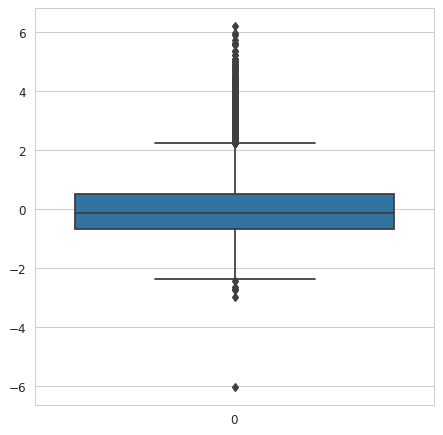

In [37]:
sns.boxplot(data=np.array(data[0]))

<AxesSubplot: ylabel='Density'>

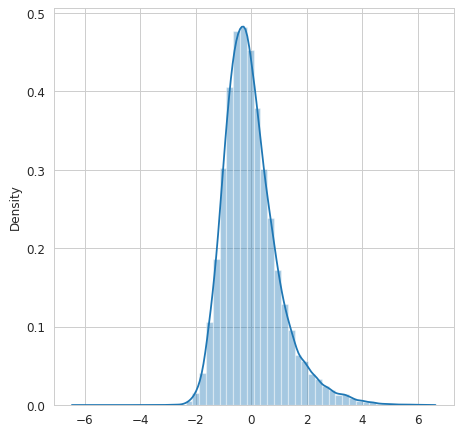

In [38]:
sns.distplot(np.array(data[0]))

In [39]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [40]:
data = data.set_index('seq')

In [41]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=1, enr_series=False)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

loading object (# entries) 20000


# Simple model with MSE Loss

,seq,0
0,CGCTGATAATGAGTCACACCTTGCCTTCCAGACAAAGTCTGTGTTC...,437117.583408
1,TCCTGTGACTCATCCATACTCGAACATCCTTATGGAGTCTGTGTTC...,409629.925695
2,CTAGTATGATGCTAACAGCATGATGACTCATACCGAGTCTGTGTTC...,390667.969212
3,TTGCGTGGTCGTCGTATTGTATGACTCATGAATTTAGTCTGTGTTC...,377628.072915
4,TGTGAGTGACTCATAGTAGATTGATTTGAAGGTTAAGTCTGTGTTC...,360399.922962
...,...,...
41899,CCGGGCTAAGAAAGGATGGAGCGCTAGTCCGGGTGCGTCTGTGTTC...,5709.272026
41900,AGAGCCATCAAGCTCCTATCTAGGACGGCCGAGCGCGTCTGTGTTC...,5058.172853
41901,GATGCAAGATAAAATAGATTCGGAGCTTCTAGAATGGTCTGTGTTC...,4634.742298
41902,CACGCCATCGTTATGAGCCTCCGGAGCGTTTAGAACGTCTGTGTTC...,2481.035063


In [42]:
# mb.models.Mubind.make_model()
# model = mb.models.Mubind("pbm", n_kernels=2, criterion = mb.tl.MSELoss(), use_dinuc=False,
#                             kernels=[0, 14], n_rounds=1,
#                             n_batches=1).to(device)

criterion = mb.tl.MSELoss()
model = mb.models.Mubind.make_model(train, 4, criterion, kernels=[0, 2, 20, 20], n_rounds=1,
                                       use_dinuc=True, dinuc_mode='local').cuda()
model.datatype = 'pbm'
model.selex_module.enr_series = False



here... 2
Using device: cuda:0


In [43]:
# model = mb.models.Mubind(use_dinuc=False, kernels=[0, 14], n_rounds=1, n_batches=1).to(device)
# optimiser = topti.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
# optimiser = topti.LBFGS(model.parameters())
# criterion = mb.tl.PoissonLoss()

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
# mb.tl.train_network(model, train, device, optimiser, criterion, num_epochs=500, early_stopping=10, log_each=10, verbose=2)

model, model_by_k = model.optimize_iterative(train, log_each=10, verbose=2, r2_per_epoch=True,
                                             lr=[0.1, 0.05, 0.05, 0.01],
                                             wd=[0.01, 0.005, 0.001, 0.001],
                                             n_epochs=[1000, 200, 200, 200],early_stopping=[10, 20, 20, 20],
                                             opt_kernel_length=[0, 0, 0, 0], opt_kernel_shift=[0, 0, 1, 1])

current kernels

Kernel to optimize 0

FREEZING KERNELS
optimizing feature type mono
setting grad status of kernel (mono, dinuc) at 0 to (1, 0)
setting grad status of kernel (mono, dinuc) at 1 to (0, 0)
setting grad status of kernel (mono, dinuc) at 2 to (0, 0)
setting grad status of kernel (mono, dinuc) at 3 to (0, 0)


kernels mask None
optimizer:  Adam 
criterion: MSELoss 
# epochs: 1000 
early_stopping: 10
lr= 0.1, weight_decay= 0.001, dir weight= 0
Epoch: 11, Loss: 210.060936, R2: -194.16,  best epoch: 9,  secs per epoch: 2.675 s,  secs epoch*1k trials: 0.134s
Epoch: 21, Loss: 70.580553, R2: -66.65,  best epoch: 19,  secs per epoch: 2.593 s,  secs epoch*1k trials: 0.130s
Epoch: 31, Loss: 34.184700, R2: -32.18,  best epoch: 29,  secs per epoch: 2.536 s,  secs epoch*1k trials: 0.127s
Epoch: 41, Loss: 19.403972, R2: -17.91,  best epoch: 39,  secs per epoch: 2.532 s,  secs epoch*1k trials: 0.127s
Epoch: 51, Loss: 12.005164, R2: -10.73,  best epoch: 49,  secs per epoch: 2.518 s,  secs 

KeyboardInterrupt: 

(4,)


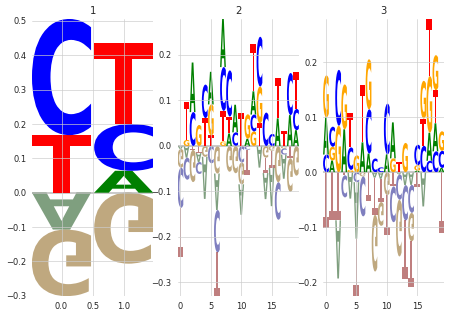

In [46]:
rcParams['figure.figsize'] = 12, 6
rcParams['figure.dpi'] = 60
mb.pl.logo(model)

In [47]:
seqs, targets, preds = mb.tl.test_network(model, train, device)

In [48]:
mb.tl.scores(model, train, by='batch')


{0: {'r2_counts': -0.009707455162572876,
  'r2_foldchange': -0.009707455162572876,
  'r2_enr': -0.009707455162572876,
  'r2_fc': 0.02854690876446428,
  'pearson_foldchange': -0.16895830481057827}}

In [ ]:
rcParams['figure.figsize'] = 6, 6
rcParams['figure.dpi'] = 86
mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t0', xlab='p0')
